In [9]:
#TASK 3
#CLUSTERING

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler


plt.style.use("dark_background")
sns.set_palette(["gold", "white", "black"])

In [ ]:
data = pd.merge(pd.read_csv("Transactions.csv"), pd.read_csv("Customers.csv"), on='CustomerID')
data_grouped = data.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
scaled_data = StandardScaler().fit_transform(data_grouped[['TotalValue', 'Quantity']])

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(scaled_data)
data_grouped['Cluster'] = kmeans.labels_

In [7]:
db_index = davies_bouldin_score(scaled_data, data_grouped['Cluster'])
print(f"DB Index: {db_index}")

DB Index: 0.72127971818163


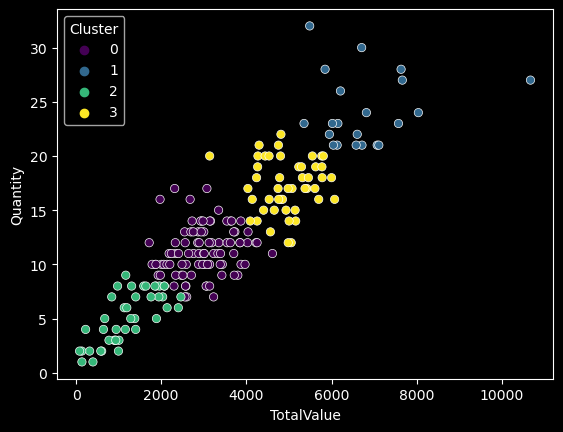

In [8]:
# Plot clusters
sns.scatterplot(x=data_grouped['TotalValue'], y=data_grouped['Quantity'], hue=data_grouped['Cluster'], palette='viridis')
plt.show()
